In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import sys
sys.path.append("/home/evangelos/workspace/Synthesis/FlowMonitoringAndAnalysis/")
import matplotlib.pyplot as plt
import pytorch_lightning as pl

In [65]:
from src.models import simple_model
from src.utils import data_generators

In [127]:
gen = data_generators.PRBS_GEN(2048,3)

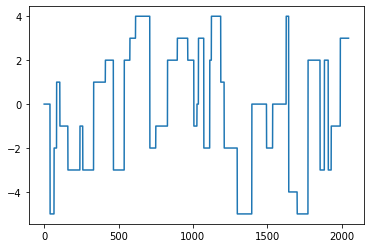

In [128]:
signal = gen.random_signal()
plt.plot(signal[:,2])

In [129]:
prbs = gen.prbs()

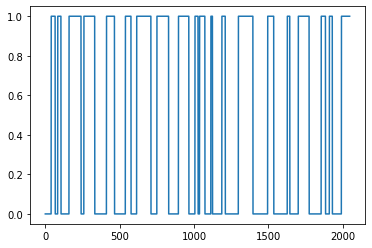

In [130]:
plt.plot(prbs[:,2])

In [85]:
import torch.nn as nn

In [145]:
class Encoder(nn.Module):
    def __init__(self, length, channels, hidden_dim):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv1d(channels, 32, 3)
        self.conv2 = nn.Conv1d(32 , 64, 3)
        self.pool = nn.AdaptiveMaxPool1d(32)
        
        self.lin1 = nn.Linear(32, 16)
        self.lin2 = nn.Linear(16, hidden_dim)
        
    def forward(self,x):
        print(x.shape)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool(x)
        print(x.shape)
        x = self.lin1(x)
        x = self.lin2(x)
        return x

In [181]:
class Decoder(nn.Module):
    def __init__(self, length, channels, hidden_dim):
        super(Decoder, self).__init__()
        self.lin1 = nn.Linear(4, 32)
        self.lin2 = nn.Linear(32, 16)
        self.pool = nn.MaxUnpool1d(3)
        self.conv1 = nn.ConvTranspose1d(64 , 32, 3)
        self.conv2 = nn.ConvTranspose1d(32, channels, 3)
        
        
    def forward(self,x):
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.pool(x,0)

        print(x.shape)
        x = self.conv1(x)
        x = self.conv2(x)
        print(x.shape)

        return x

In [182]:
encoder = Encoder(2048, 3, 4)

In [183]:
decoder = Decoder(2048, 3, 4)

In [184]:
latent = encoder(torch.Tensor(prbs).transpose_(0,1).unsqueeze(0))

torch.Size([1, 3, 2048])
torch.Size([1, 64, 32])


In [185]:
latent.shape

torch.Size([1, 64, 4])

In [186]:
decoder(latent)

AttributeError: 'int' object has no attribute 'unsqueeze'

In [112]:
import pytorch_lightning as pl

class AE(pl.LightningModule):

    # model
    def __init__(self, length, channels, hidden_dim):
        self.conv1 = nn.Conv1d(channels, 32, 3)
        self.conv2 = nn.Conv1d(32 , 64, 3)
        self.pool = nn.AdaptiveMaxPool1d(128)
        
        self.lin1 = nn.Linear(128, 64)
        self.lin2 = nn.Linear(64, hidden_dim)
        

    # computations
    def forward(self, x):
        

    # training loop
    def training_step(self, batch, batch_idx):

    # validation loop
    def validation_step(self, batch, batch_idx):
    def validation_end(self, outputs):

    # test loop
    def test_step(self, batch, batch_idx):
    def test_epoch_end(self, outputs):

    # optimizer
    def configure_optimizers(self):

    # data
    def prepare_data(self):
    def train_dataloader(self):
    def val_dataloader(self):
    def test_dataloader(self):